<p>This project is explained in the following steps below;</p>

<ul>
<li>Load Data</li>
<li>Define Keras Model</li>
<li>Compile Keras Model</li>
<li>Fit Keras Model</li>
<li>Evaluate Keras Model</li>
<li>Tie It All Together</li>
<li>Make Predictions</li>
</ul>

In [72]:
#Import dependencies module
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [41]:
#Load dataset 
df =  pd.read_csv("Medical_insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [42]:
from sklearn.preprocessing import LabelEncoder, Binarizer

df['binarizedSex'] = LabelEncoder().fit_transform(df["sex"])
df['binarizedSmoker'] = LabelEncoder().fit_transform(df['smoker'])
df['binarizedRegion'] = LabelEncoder().fit_transform(df['region'])

df.head()

,age,sex,bmi,children,smoker,region,charges,binarizedSex,binarizedSmoker,binarizedRegion
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1


EDA - Exploratory Data Analysis

In [43]:
df2 = df[["age", "binarizedSex", "bmi", "children", "binarizedSmoker", "binarizedRegion", "charges"]]
df2.head()

,age,binarizedSex,bmi,children,binarizedSmoker,binarizedRegion,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [44]:
#Get
df2.columns

Index(['age', 'binarizedSex', 'bmi', 'children', 'binarizedSmoker',
       'binarizedRegion', 'charges'],
      dtype='object')

In [45]:
#Get shape
df.shape

(2772, 10)

In [46]:
#Get information on the features
df2.dtypes

age                  int64
binarizedSex         int64
bmi                float64
children             int64
binarizedSmoker      int64
binarizedRegion      int64
charges            float64
dtype: object

In [47]:
#Summarize the dataset
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,2772.0,39.109668,14.081459,18.0000,26.000,39.00000,51.0000,64.00000
binarizedSex,2772.0,0.507215,0.500038,0.0000,0.000,1.00000,1.0000,1.00000
bmi,2772.0,30.701349,6.129449,15.9600,26.220,30.44750,34.7700,53.13000
children,2772.0,1.101732,1.214806,0.0000,0.000,1.00000,2.0000,5.00000
binarizedSmoker,2772.0,0.203463,0.402647,0.0000,0.000,0.00000,0.0000,1.00000
binarizedRegion,2772.0,1.532468,1.103467,0.0000,1.000,2.00000,2.0000,3.00000
charges,2772.0,13261.369959,12151.768945,1121.8739,4687.797,9333.01435,16577.7795,63770.42801


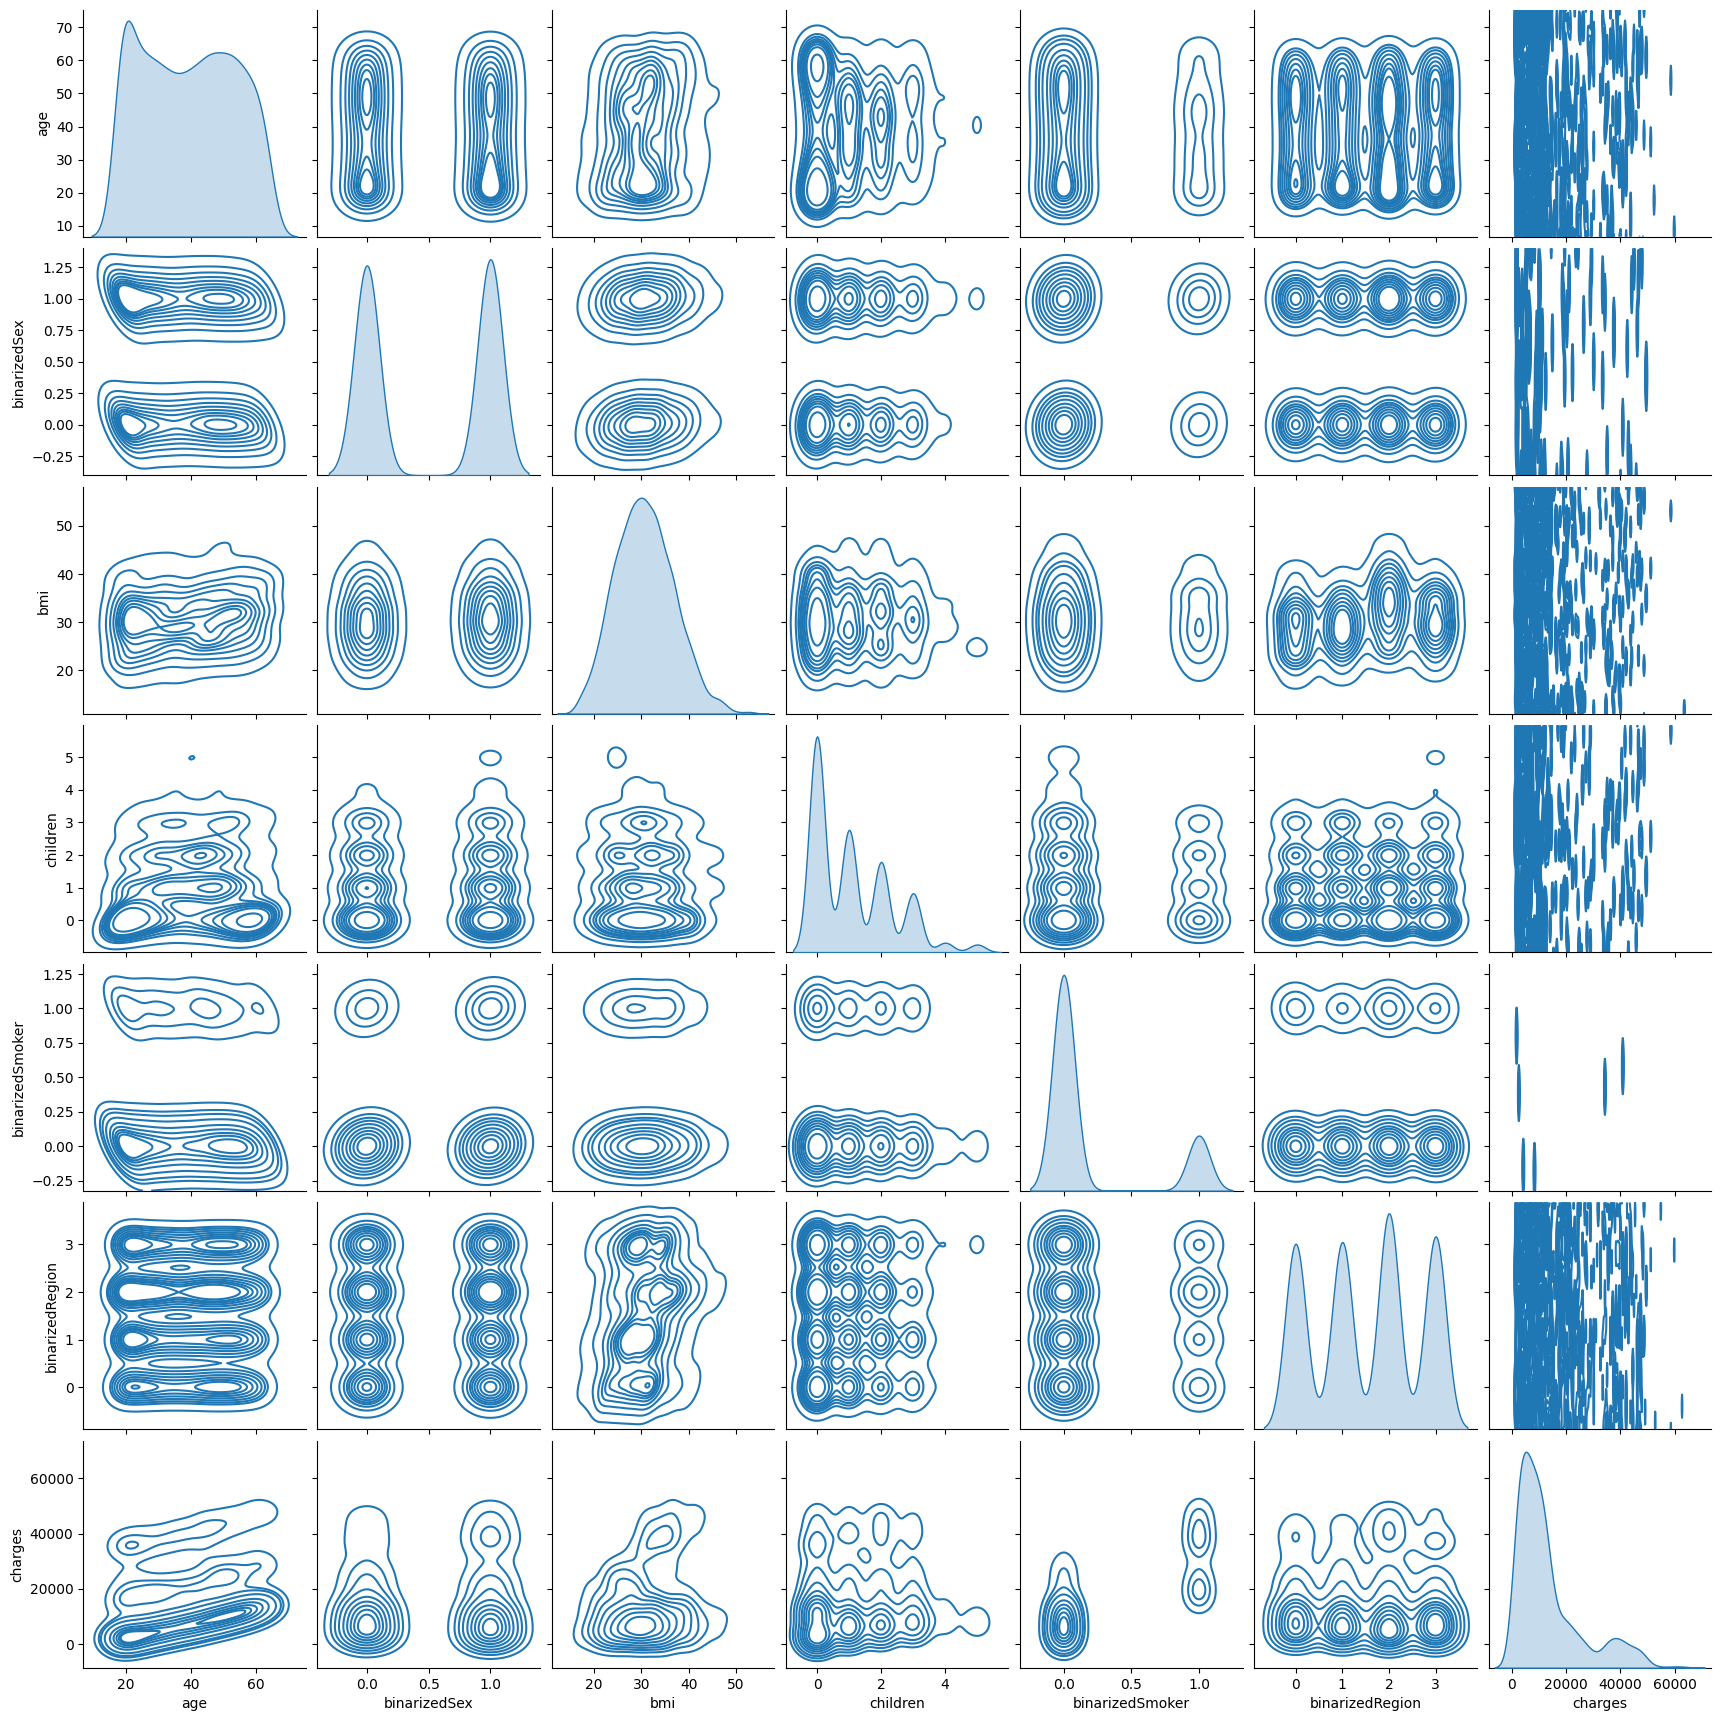

In [48]:
sns.pairplot(df2, kind="kde")
plt.show()

In [49]:
#Define Variable
X = df2[["age", "binarizedSex", "bmi", "children", "binarizedSmoker", "binarizedRegion"]]
y = df2.charges

In [79]:
#Train test split datset
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.10, random_state=20)

Build Regression model

In [55]:
model = Sequential()
model.add(Dense(500, input_shape=(6,), activation = "relu"))
model.add(Dense(100, activation = "relu"))
model.add(Dense(50, activation = "relu"))
model.add(Dense(1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 500)               3500      
                                                                 
 dense_9 (Dense)             (None, 100)               50100     
                                                                 
 dense_10 (Dense)            (None, 50)                5050      
                                                                 
 dense_11 (Dense)            (None, 1)                 51        
                                                                 
Total params: 58701 (229.30 KB)
Trainable params: 58701 (229.30 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
#Compile and fit dataset
model.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ['mean_squared_error'])
model.fit(X_train, y_train, epochs=100)

Epoch 1/500
70/70 [==============================] - 0s 725us/step - loss: 21626684.0000 - mean_squared_error: 21626684.0000
Epoch 2/500
70/70 [==============================] - 0s 792us/step - loss: 21243230.0000 - mean_squared_error: 21243230.0000
Epoch 3/500
70/70 [==============================] - 0s 750us/step - loss: 21171166.0000 - mean_squared_error: 21171166.0000
Epoch 4/500
70/70 [==============================] - 0s 770us/step - loss: 21226170.0000 - mean_squared_error: 21226170.0000
Epoch 5/500
70/70 [==============================] - 0s 770us/step - loss: 21023002.0000 - mean_squared_error: 21023002.0000
Epoch 6/500
70/70 [==============================] - 0s 809us/step - loss: 21303402.0000 - mean_squared_error: 21303402.0000
Epoch 7/500
70/70 [==============================] - 0s 808us/step - loss: 21231188.0000 - mean_squared_error: 21231188.0000
Epoch 8/500
70/70 [==============================] - 0s 778us/step - loss: 21171440.0000 - mean_squared_error: 21171440.0000


In [69]:
pred_train= model.predict(X_train)
output = pd.DataFrame(X_train)
output["pred"] = pred_train
output.head(10)

70/70 [==============================] - 0s 384us/step


,age,binarizedSex,bmi,children,binarizedSmoker,binarizedRegion,pred
2314,62,0,39.160,0,0,2,14968.942383
2084,56,1,33.725,0,0,1,12985.591797
2569,48,0,27.360,1,0,0,10266.661133
1633,24,1,35.860,0,0,2,5014.217285
2456,37,1,37.070,1,1,2,39497.511719
409,32,1,30.030,1,0,2,6053.091797
1075,32,0,29.590,1,0,2,6137.499023
2709,42,0,40.370,2,1,2,43885.097656
105,20,1,28.025,1,1,1,18847.177734
1934,25,0,28.595,0,0,0,4470.473633


Evaluation

In [74]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [80]:
pred_train = model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred))) 

78/78 [==============================] - 0s 358us/step
4257.2540901854945
9/9 [==============================] - 0s 423us/step
4868.983709859194


<h1>Conclusion</h1>
<p>The output above shows that the RMSE,our evaluation metric, was 4257.25 thousand for train data and 4868.98 thousand for test data. Ideally, the lower the RMSE value, the better the model performance.
Our model is slowly achieving a stable performance with much variance in the train and test set RMSE. The most ideal result would be an RMSE value of zero, but that's almost impossible in real datasets. Also, since the unit of the target variable is in thousands, that also affects the RMSE value. This regression problem could also be modeled using other algorithms such as Decision Tree, Random Forest, Gradient Boosting or Support Vector Machines.</p>